<a href="https://colab.research.google.com/github/mstiti/PRODIGY_DS_01/blob/main/WORLD_POPULATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pandas matplotlib seaborn

In [10]:
import pandas as pd

In [18]:
file_path = "/API_SP.POP.TOTL_DS2_en_csv_v2_1220187.csv"
data = pd.read_csv(file_path, skiprows=4)

# Display the first few rows of the dataframe
print(data.head())

                  Country Name Country Code     Indicator Name Indicator Code  \
0                        Aruba          ABW  Population, total    SP.POP.TOTL   
1  Africa Eastern and Southern          AFE  Population, total    SP.POP.TOTL   
2                  Afghanistan          AFG  Population, total    SP.POP.TOTL   
3   Africa Western and Central          AFW  Population, total    SP.POP.TOTL   
4                       Angola          AGO  Population, total    SP.POP.TOTL   

          1960         1961         1962         1963         1964  \
0      54608.0      55811.0      56682.0      57475.0      58178.0   
1  130692579.0  134169237.0  137835590.0  141630546.0  145605995.0   
2    8622466.0    8790140.0    8969047.0    9157465.0    9355514.0   
3   97256290.0   99314028.0  101445032.0  103667517.0  105959979.0   
4    5357195.0    5441333.0    5521400.0    5599827.0    5673199.0   

          1965  ...         2015         2016         2017         2018  \
0      58782.0  .

In [27]:
import pandas as pd

file_path = "/API_SP.POP.TOTL_DS2_en_csv_v2_1220187.csv"
data = pd.read_csv(file_path, skiprows=4)

# Print the available column names
print(data.columns)

# Select relevant columns (Country Name and population for the year 2019)
# Adjust the column names below if necessary based on the printed output
data = data[['Country Name', '2019', '2020', '2021', '2022', '2023']]

print(data.head(10))

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       '2023', 'Unnamed: 68'],
      dtype='object')
                  Country Name         2019         2020         2021  \
0                        Aruba     106442.0     106585.0     106537.0   
1  Africa Eastern and Southern  667242986.0  685112979.0  702977106.0   
2                  Afghanistan   37769499.0   38972230.0   40099462.0   
3   Africa Western and Cent

In [29]:
# Drop rows with missing values
data = data.dropna()

# Rename columns for clarity
data.columns = ['Country Name', 'Population 2019', 'Population 2020', 'Population 2021', 'Population 2022', 'Population 2023']

# Display the first few rows of the cleaned dataframe
print(data.head())


                  Country Name  Population 2019  Population 2020  \
0                        Aruba         106442.0         106585.0   
1  Africa Eastern and Southern      667242986.0      685112979.0   
2                  Afghanistan       37769499.0       38972230.0   
3   Africa Western and Central      454306063.0      466189102.0   
4                       Angola       32353588.0       33428486.0   

   Population 2021  Population 2022  Population 2023  
0         106537.0         106445.0         106277.0  
1      702977106.0      720859132.0      739108306.0  
2       40099462.0       41128771.0       42239854.0  
3      478185907.0      490330870.0      502789511.0  
4       34503774.0       35588987.0       36684202.0  


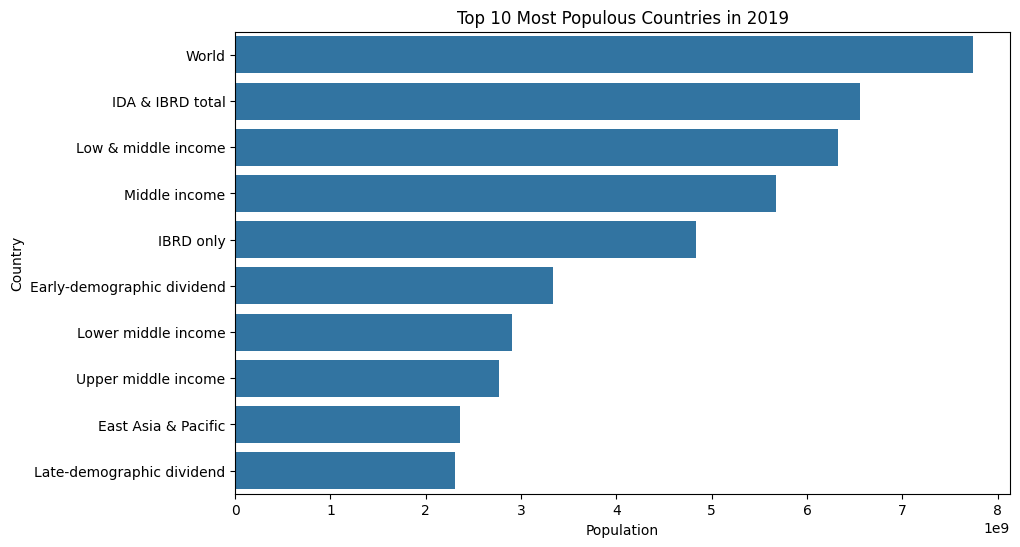

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort data by population in 2019 in descending order and select the top 10 countries
top_10_countries = data.sort_values(by='Population 2019', ascending=False).head(10)

# Create the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Population 2019', y='Country Name', data=top_10_countries) # Use 'Country Name' for the y-axis
plt.title('Top 10 Most Populous Countries in 2019')
plt.xlabel('Population')
plt.ylabel('Country')
plt.show()

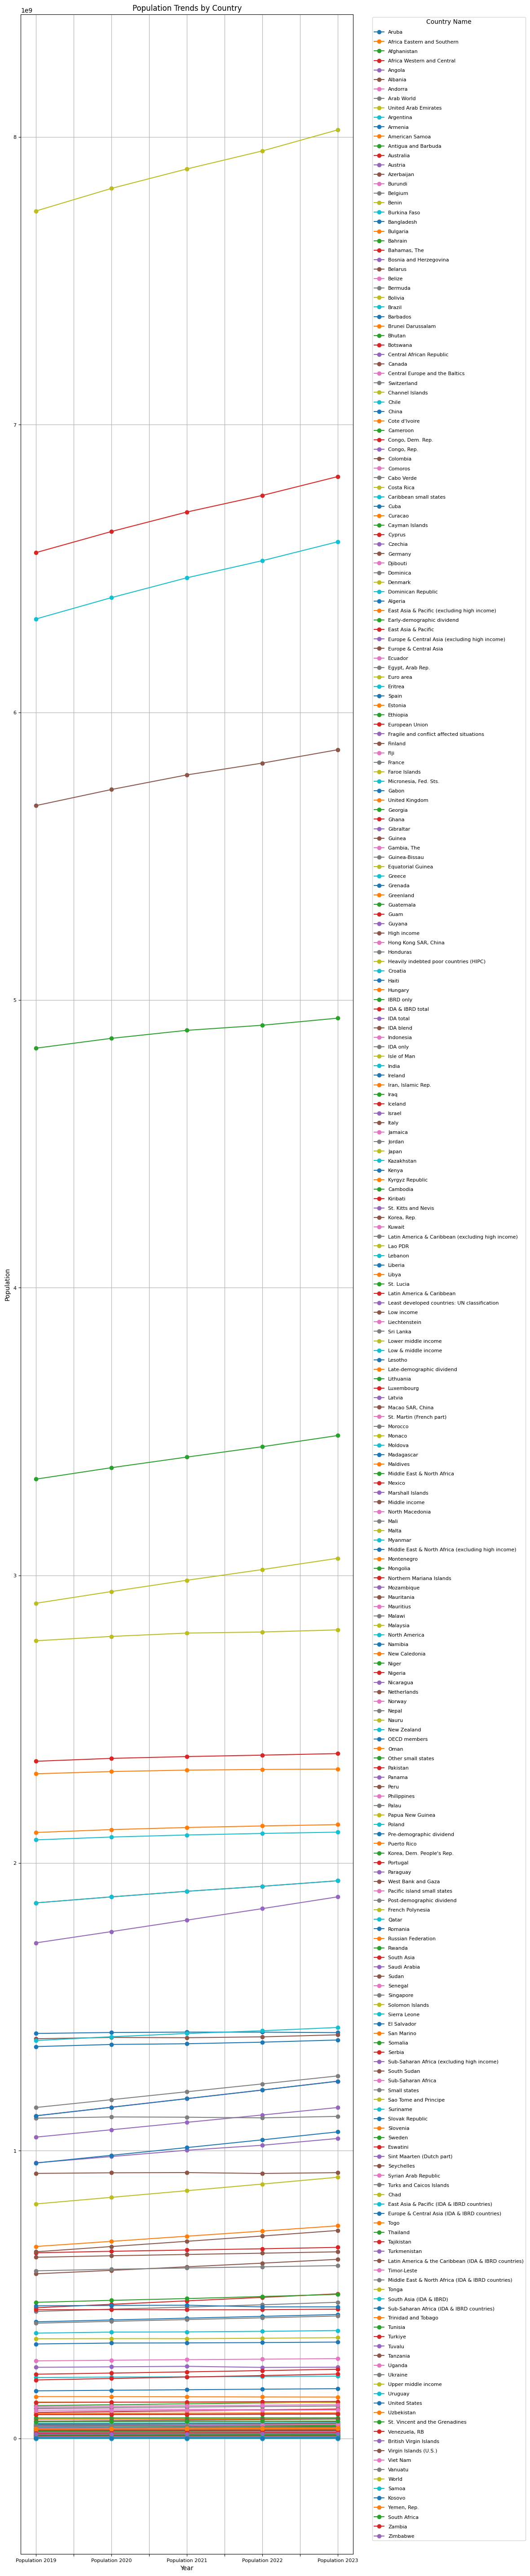

In [47]:
import matplotlib.pyplot as plt

# Plot each country's population over the years
ax = data.T.plot(kind='line', marker='o', figsize=(12, 64))

# Customize the plot
plt.title('Population Trends by Country')
plt.xlabel('Year')
plt.ylabel('Population')

# Adjust font size
plt.xticks(fontsize=8)  # Reduce font size of x-axis labels
plt.yticks(fontsize=8)  # Reduce font size of y-axis labels
plt.legend(title='Country Name', fontsize=8, loc='upper left', bbox_to_anchor=(1.05, 1))  # Adjust legend position

# Increase line spacing in legend
plt.legend(title='Country Name', fontsize=8, loc='upper left', bbox_to_anchor=(1.05, 1), labelspacing=1)

plt.grid(True)
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

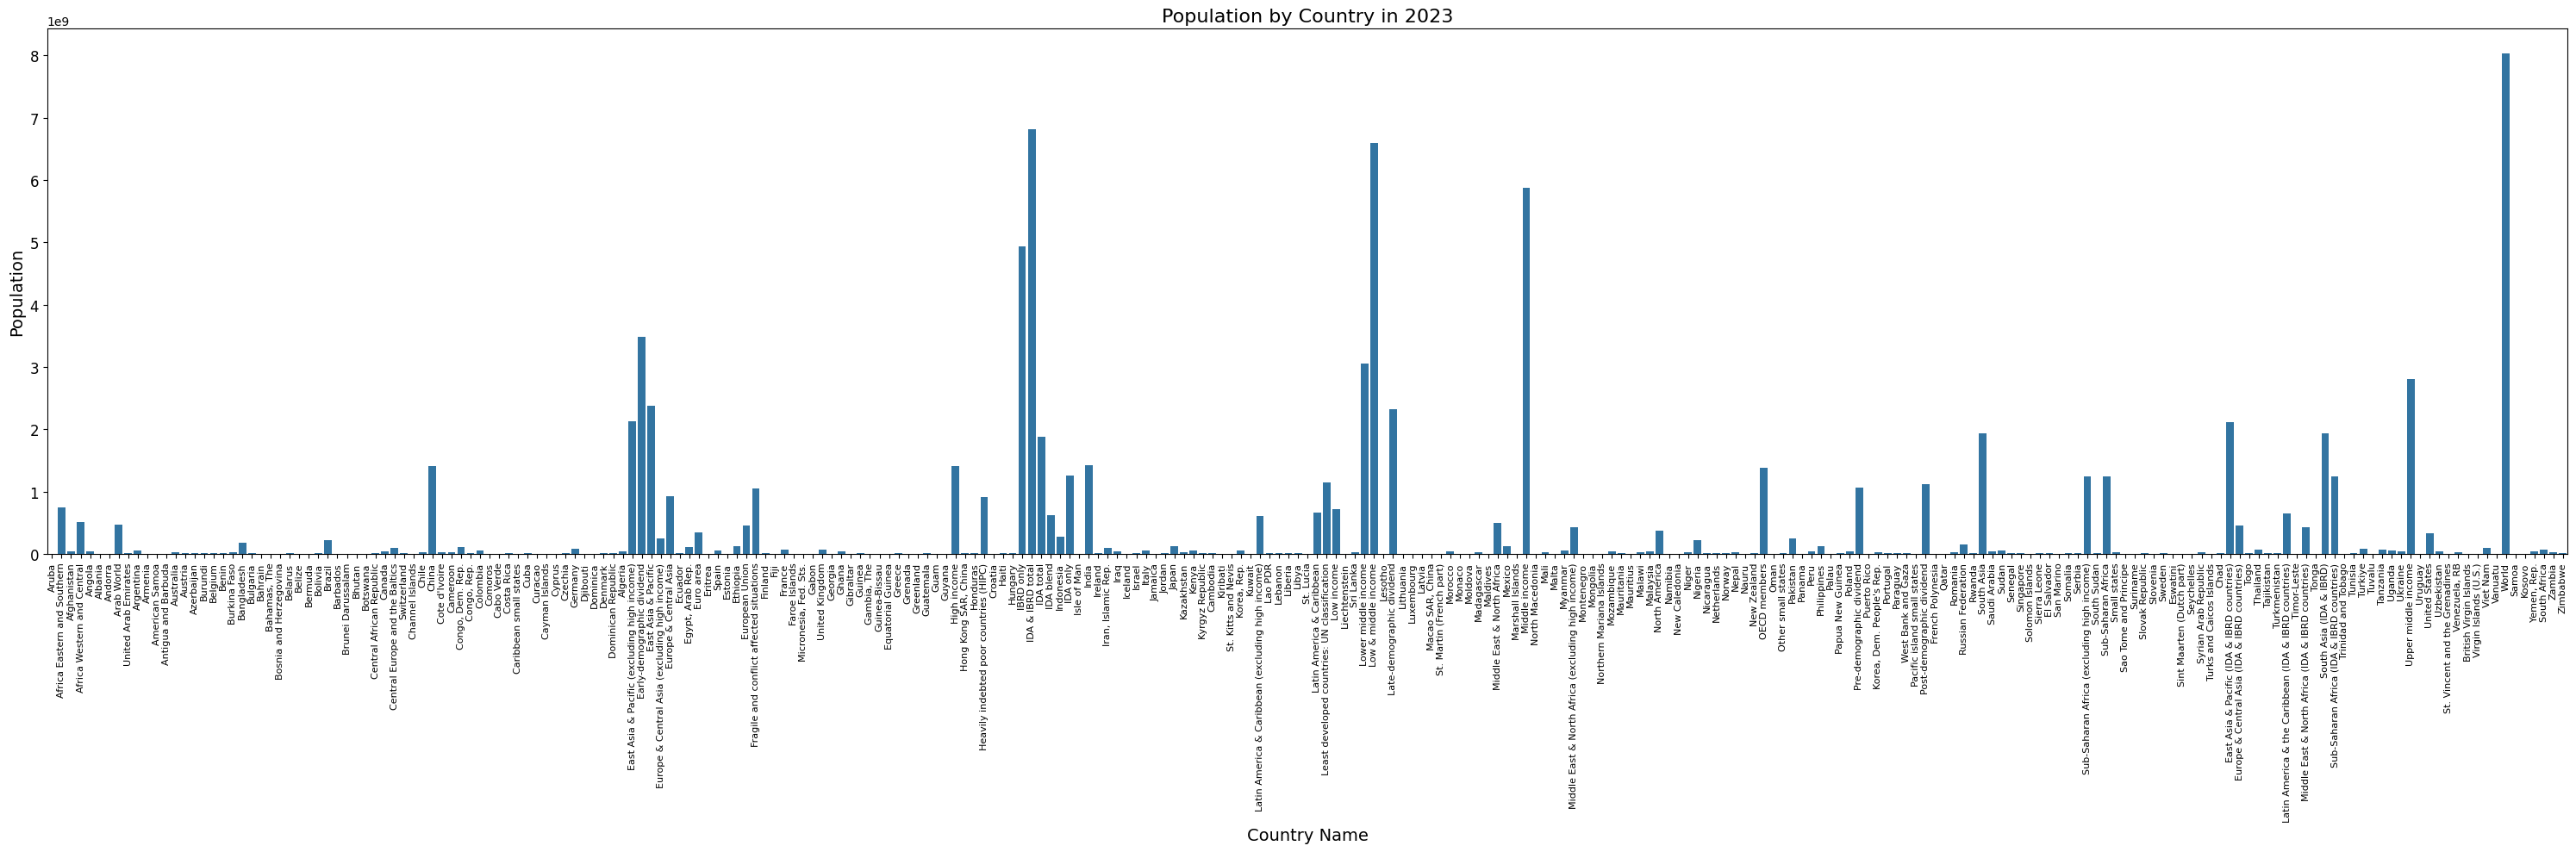

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

if 'level_0' in data.columns:
    data = data.drop(columns=['level_0'])

# Reset the index for plotting
data.reset_index(inplace=True)

# Melt the dataframe to long format for easier plotting
data_long = data.melt(id_vars='Country Name', var_name='Year', value_name='Population')

# Increase the figure size
plt.figure(figsize=(30, 10))

# Plot bar plot for a specific year, e.g., 2023
sns.barplot(x='Country Name', y='Population', data=data_long[data_long['Year'] == 'Population 2023'])

# Customize the plot
plt.title('Population by Country in 2023', fontsize=16)
plt.xlabel('Country Name', fontsize=14)
plt.ylabel('Population', fontsize=14)
plt.xticks(rotation=90, fontsize=8)  # Increase font size of x-axis labels
plt.yticks(fontsize=12)  # Increase font size of y-axis labels

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

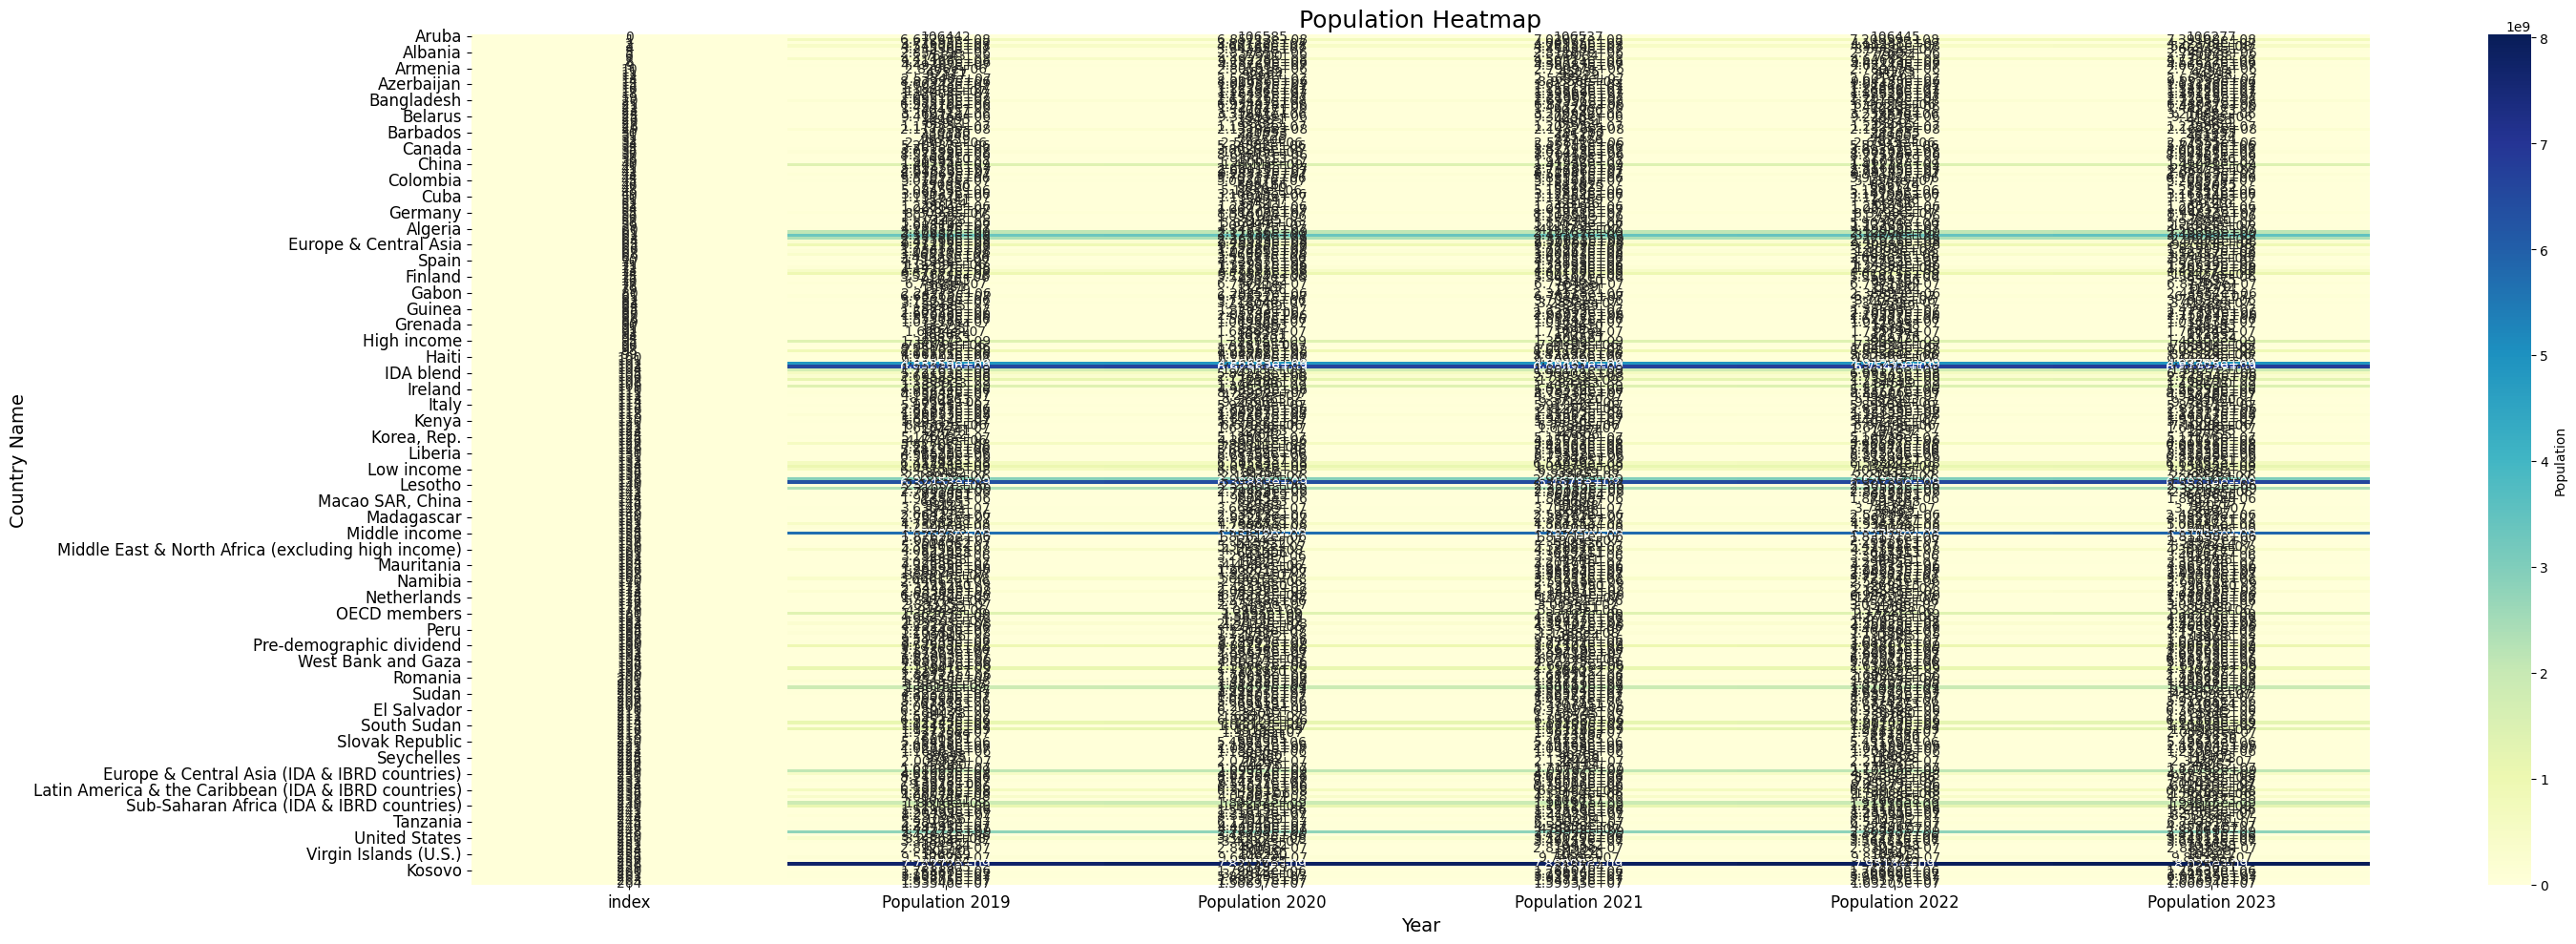

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check if 'level_0' is a column and drop it if it is
if 'level_0' in data.columns:
    data = data.drop(columns=['level_0'])

# Reset the index if needed
data = data.reset_index()  # This will bring back the original index, and potentially 'Country Name' if it was part of the index

# Set the index to 'Country Name' for better heatmap plotting
data.set_index('Country Name', inplace=True)

# Increase the figure size
plt.figure(figsize=(30, 10))

# Plot a heatmap with adjusted font sizes
sns.heatmap(data, annot=True, fmt='g', cmap='YlGnBu', annot_kws={"size": 10}, cbar_kws={'label': 'Population'})

# Customize the plot
plt.title('Population Heatmap', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Country Name', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

In [77]:
import plotly.express as px

# Check if 'level_0' column exists and drop it if it does
if 'level_0' in data.columns:
    data = data.drop(columns=['level_0'])

# Now reset the index
data.reset_index(inplace=True)

# Melt the dataframe to long format for easier plotting
data_long = data.melt(id_vars='Country Name', var_name='Year', value_name='Population')

# Increase the figure size
plt.figure(figsize=(30, 20))

# Create an interactive line plot
fig = px.line(data_long, x='Year', y='Population', color='Country Name', markers=True, title='Population Trends by Country')
fig.update_layout(xaxis_title='Year', yaxis_title='Population')
fig.show()

<Figure size 3000x2000 with 0 Axes>